# 1. Import all necessary libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from ucimlrepo import fetch_ucirepo 

# 2. Load the data to a Pandas dataframe

In [15]:
# fetch the dataset
maternal_health_risk = fetch_ucirepo(id=863) 
  
# data (as pandas dataframes) 
df = maternal_health_risk.data.features 
target = maternal_health_risk.data.targets 

# add the target to the dataframe
df = pd.concat([df, target], axis=1)



### Review the metadata

In [16]:
# metadata 
print(maternal_health_risk.metadata) 

# variable information 
print(maternal_health_risk.variables) 

{'uci_id': 863, 'name': 'Maternal Health Risk', 'repository_url': 'https://archive.ics.uci.edu/dataset/863/maternal+health+risk', 'data_url': 'https://archive.ics.uci.edu/static/public/863/data.csv', 'abstract': 'Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1013, 'num_features': 6, 'feature_types': ['Real', 'Integer'], 'demographics': ['Age'], 'target_col': ['RiskLevel'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DP5D', 'creators': ['Marzia Ahmed'], 'intro_paper': {'title': 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)', 'authors': 'Marzia Ahmed, M. A. Kashem,

# 3. Get to know the data

In [17]:
# Display the first few rows of the dataset
df.head()



,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [18]:
# Get the summary statistics of the dataset
df.describe() 

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [19]:
# Count the number of unique values in each column
df.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

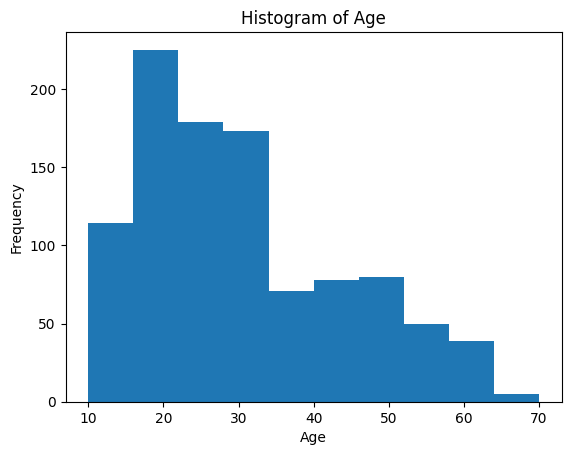

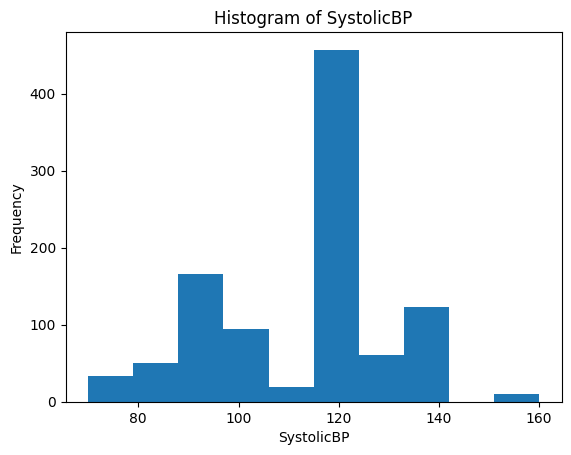

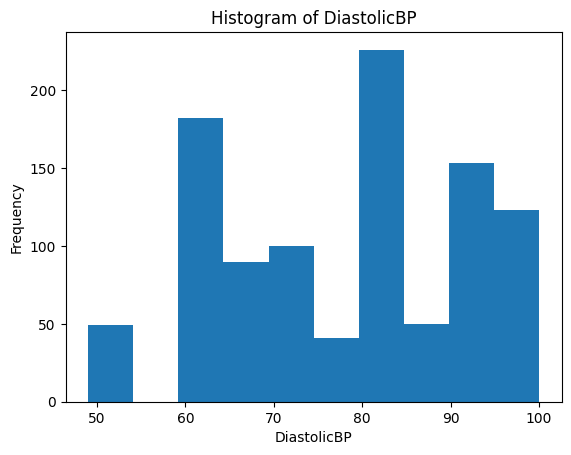

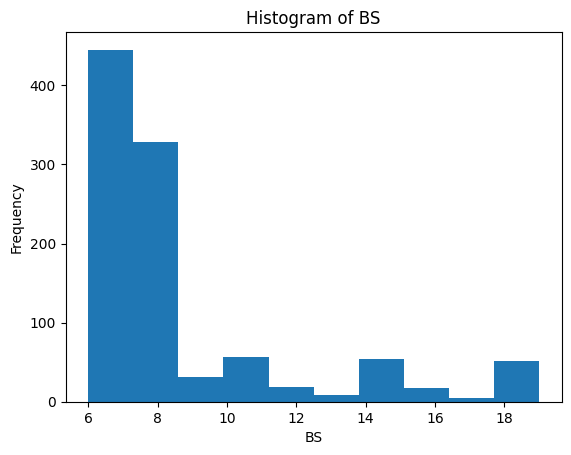

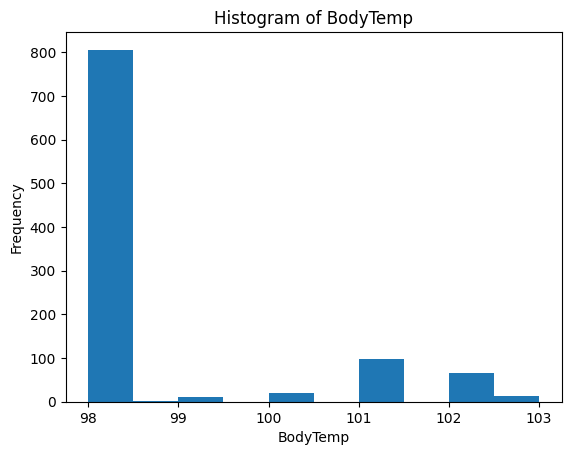

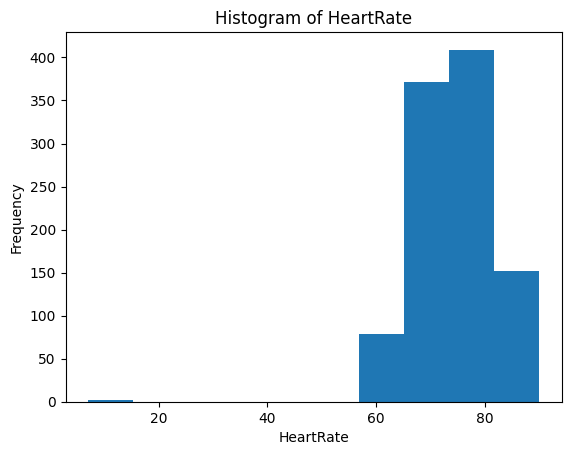

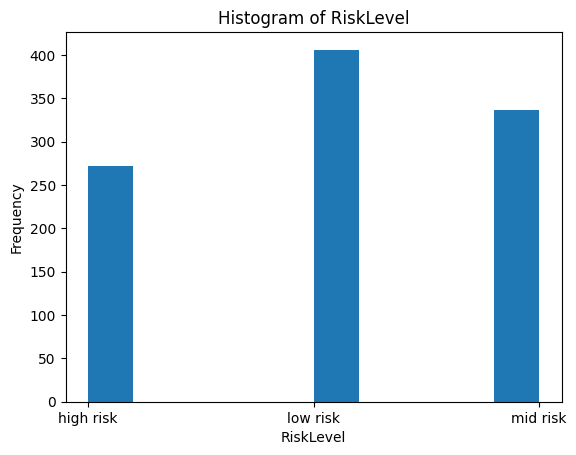

In [20]:
# Function to create histograms
def create_histograms(df):
    for column in df.columns:
        plt.hist(df[column])
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()
        
create_histograms(df)


# 4. Clean the data

## Identify null values with the isnull() function

In [21]:

df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

## Determine outliers

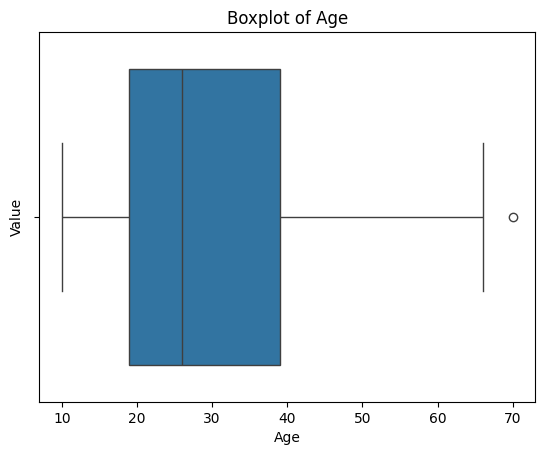

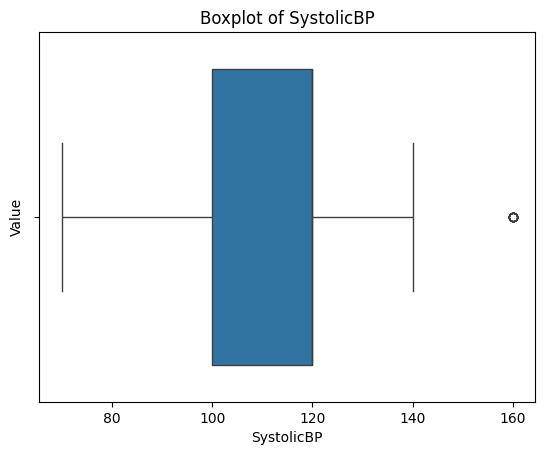

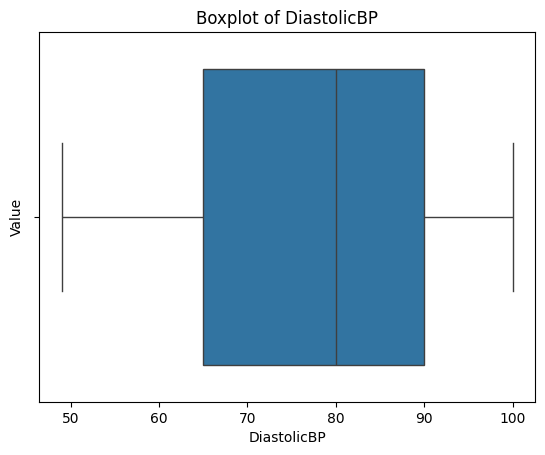

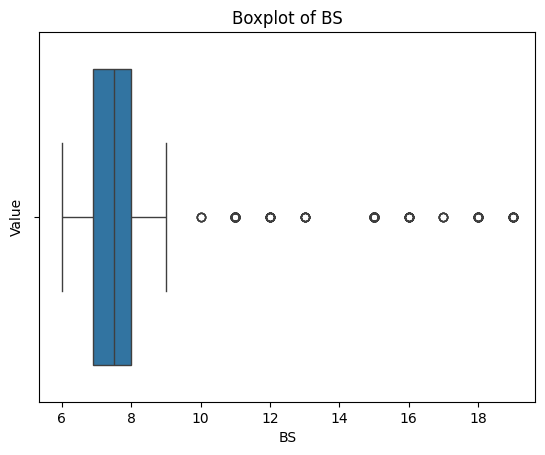

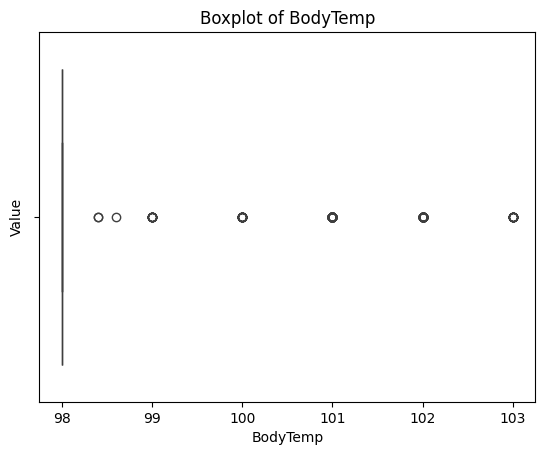

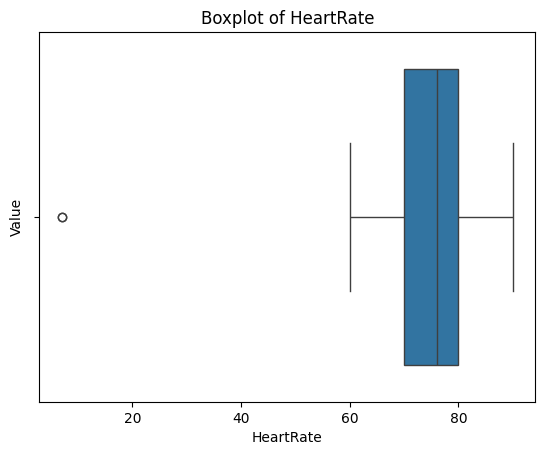

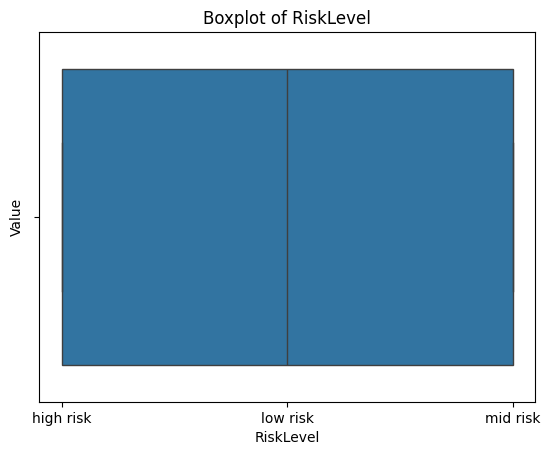

In [22]:
# Function to create a bar plot of the missing values
def boxplot_features(df):
    for column in df.columns:
        sns.boxplot(x=df[column])
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.title(f'Boxplot of {column}')
        plt.show()

boxplot_features(df)



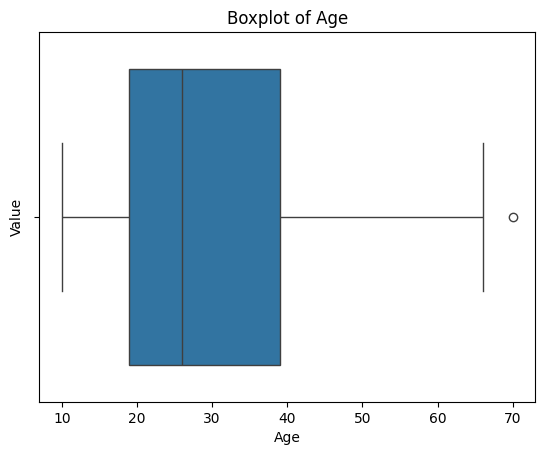

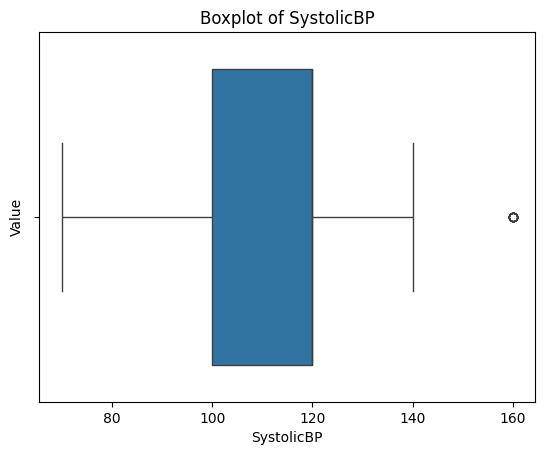

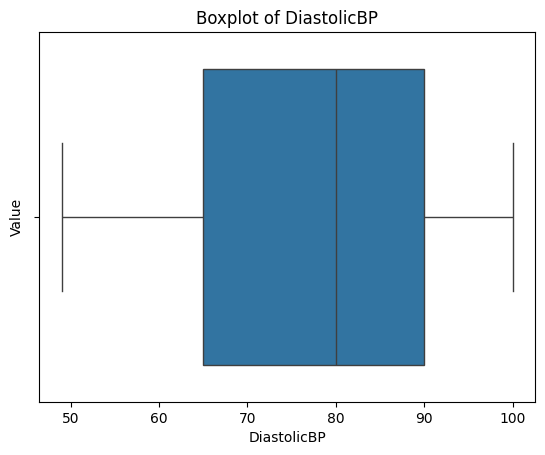

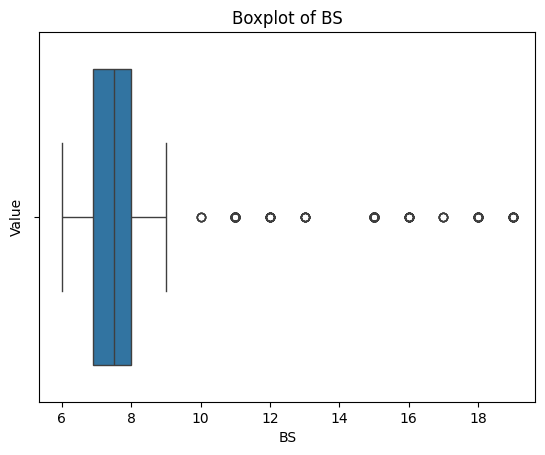

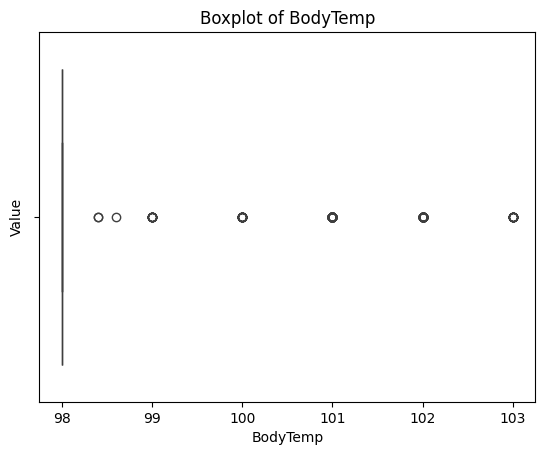

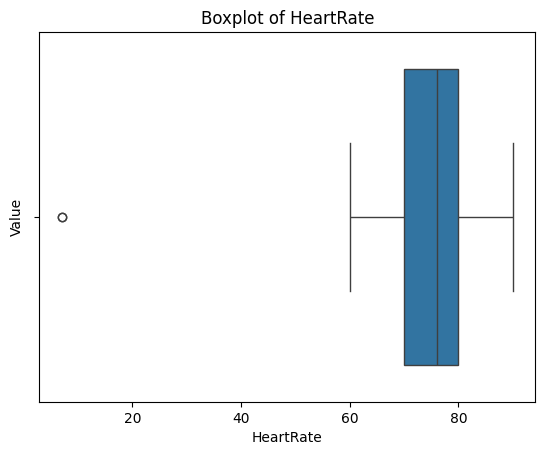

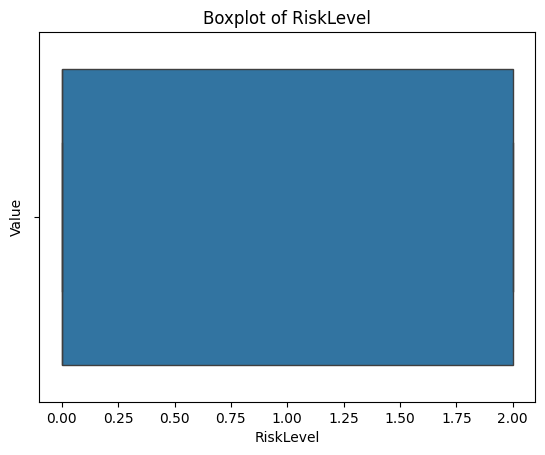

In [24]:
def explore_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for column in numeric_columns:
        # Calculate the z-scores for the column
        z_scores = (df[column] - df[column].mean()) / df[column].std()

        # Define the threshold for considering an observation as an outlier
        threshold = 3

        # Identify the outliers
        outliers = df[abs(z_scores) > threshold]

        # Print the outliers
        print(f"Outliers in {column}:")
        print(outliers)
        print()


# 5. Explore possible correlations

## Convert the categorical target variable to a numerical variable

In [25]:
# Define the mapping dictionary
risk_mapping = {'low risk': 0, 'medium risk': 1, 'high risk': 2}

# Apply the mapping to the 'RiskLevel' column
df['RiskLevel'] = df['RiskLevel'].map(risk_mapping)


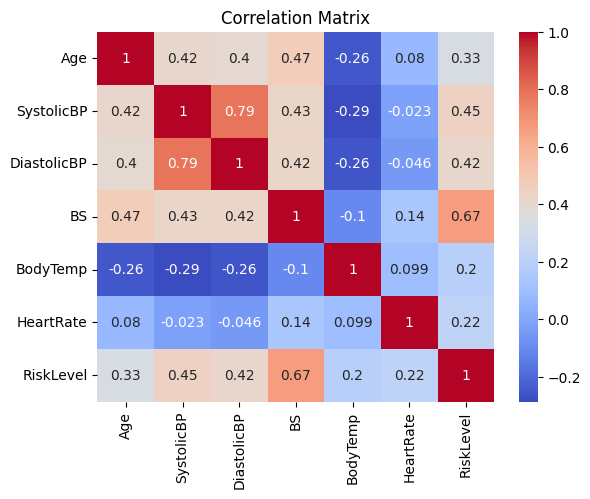

In [26]:
def explore_correlations(df):
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

explore_correlations(df)


## Scatterplots

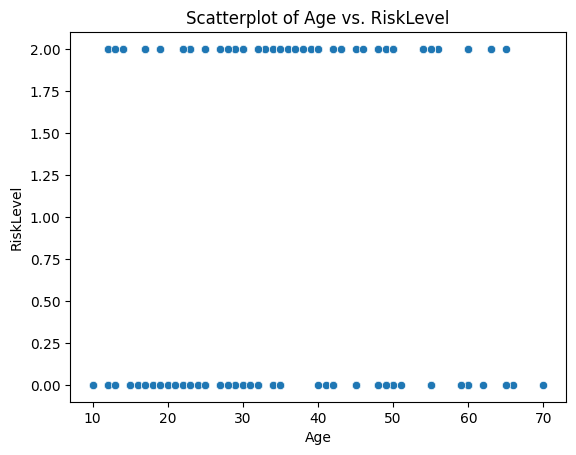

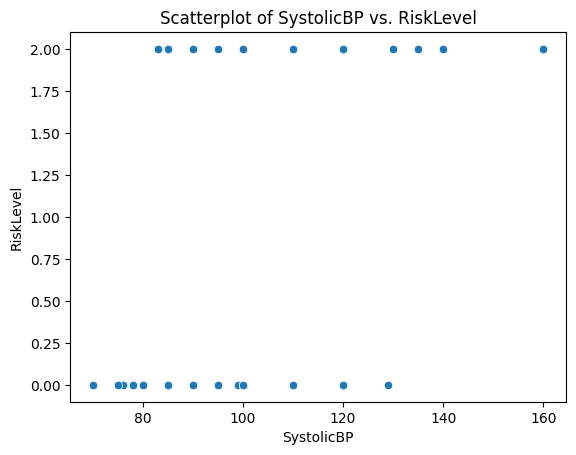

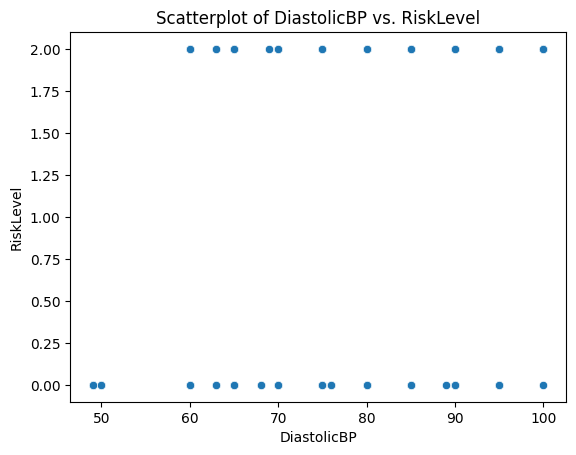

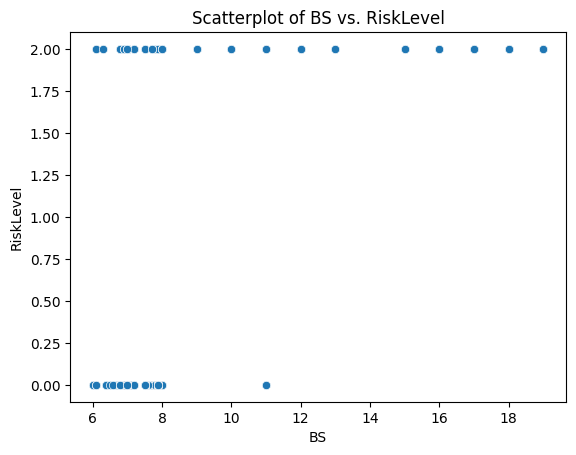

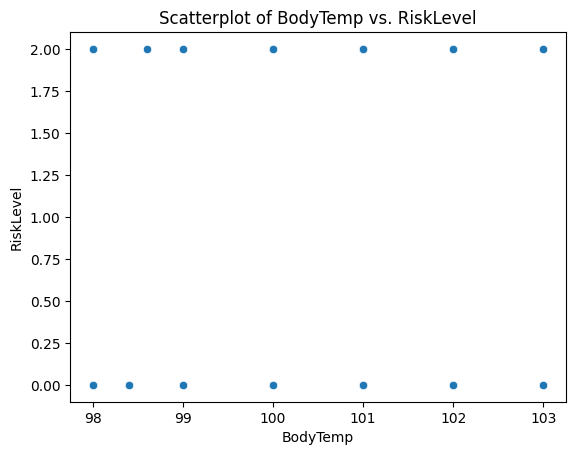

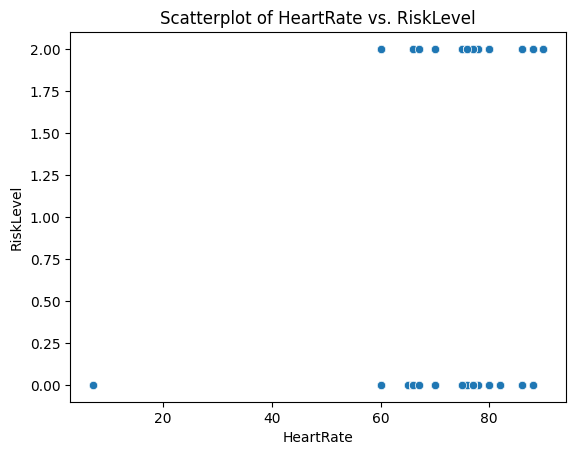

In [29]:
def create_scatterplots(df):
    for column in df.columns[:-1]:  # Exclude the target variable
        sns.scatterplot(x=column, y='RiskLevel', data=df)
        plt.xlabel(column)
        plt.ylabel('RiskLevel')
        plt.title(f'Scatterplot of {column} vs. RiskLevel')
        plt.show()

create_scatterplots(df)

No correlation found.

## Univariate Analysis

### Kernel Density Estimation (KDE) Plots

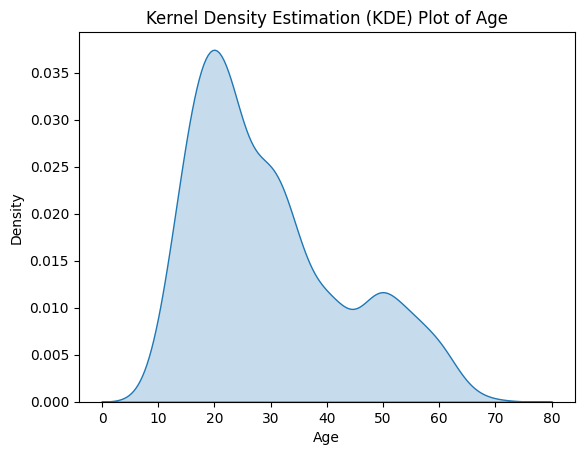

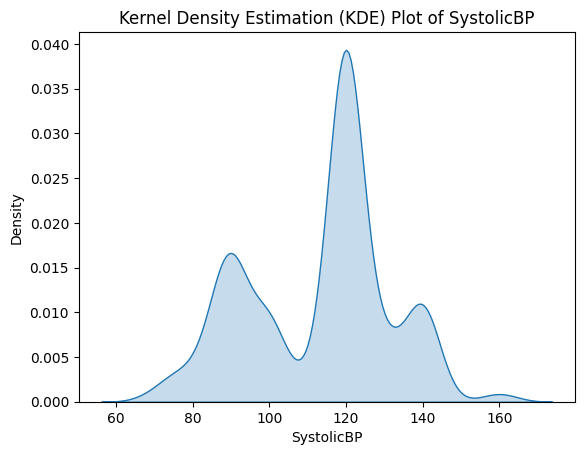

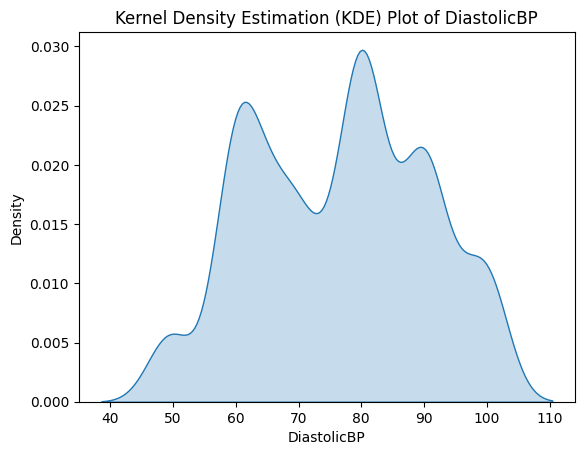

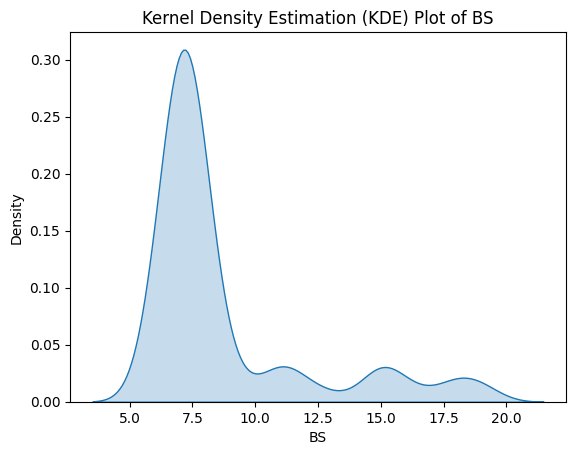

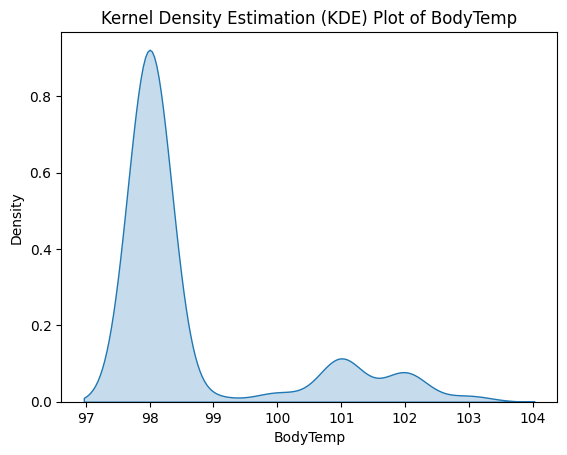

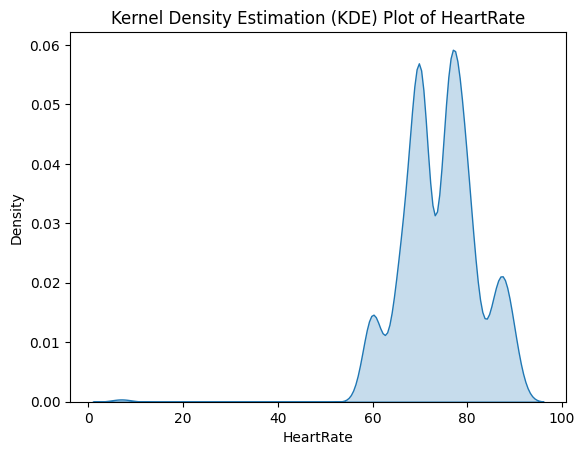

In [28]:
def create_kde_plots(df):
    for column in df.columns[:-1]:  # Exclude the target variable
        sns.kdeplot(df[column], fill=True)
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.title(f'Kernel Density Estimation (KDE) Plot of {column}')
        plt.show()

create_kde_plots(df)

# Cumulative Distribution Function (CDF) Plots

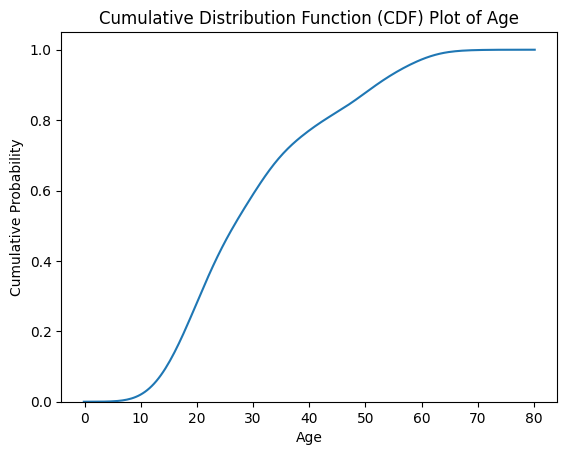

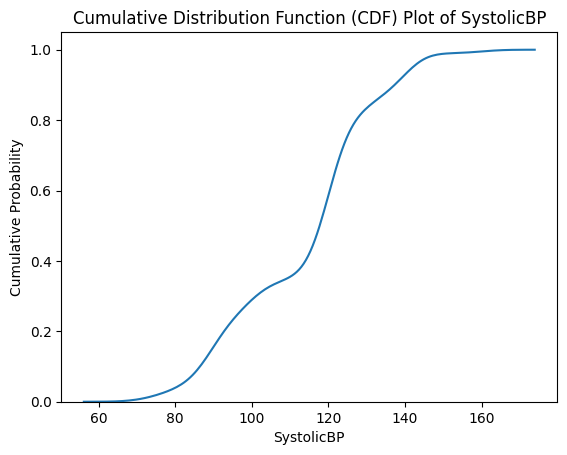

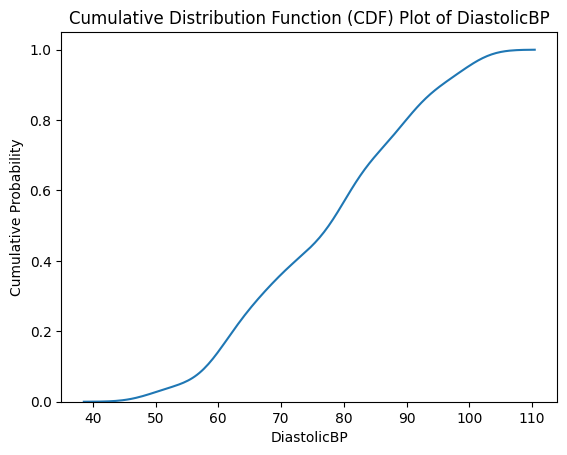

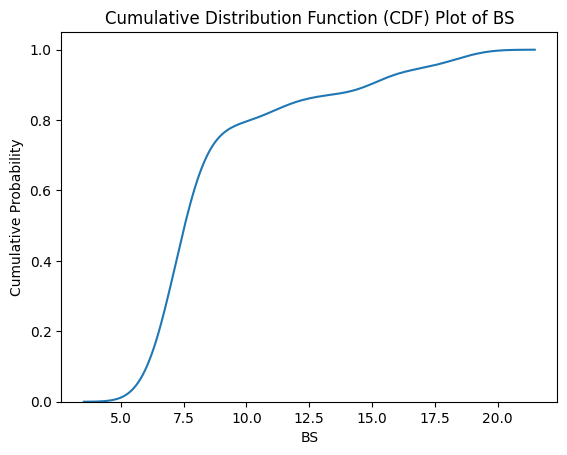

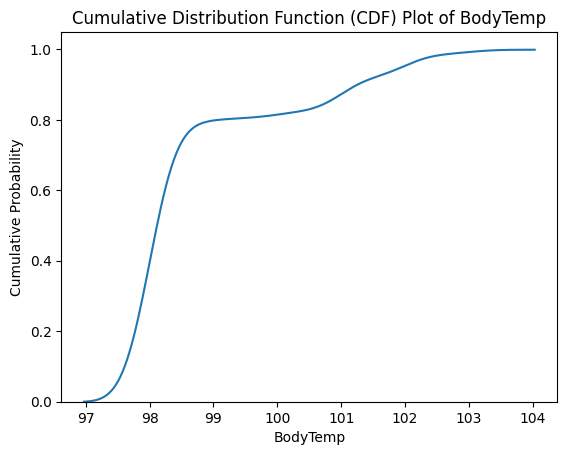

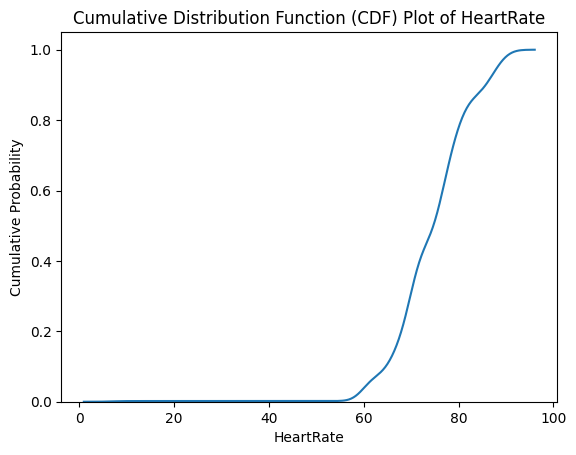

In [30]:
def create_cdf_plots(df):
    for column in df.columns[:-1]:  # Exclude the target variable
        sns.kdeplot(df[column], cumulative=True)
        plt.xlabel(column)
        plt.ylabel('Cumulative Probability')
        plt.title(f'Cumulative Distribution Function (CDF) Plot of {column}')
        plt.show()

create_cdf_plots(df)